In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random
from google.colab import drive
from google.colab import files
import shutil

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from numpy.random import seed
import pickle
seed(1)
tf.random.set_seed(1)

In [ ]:
# mount drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root_path = "/content/drive/Shareddrives/[Deep Learning Project]"
dataset_dir = os.path.join(root_path, "Dataset")
balanced_train_dir = os.path.join(dataset_dir, 'balanced_train') # We're using the balanced dataset
balanced_test_dir = os.path.join(dataset_dir, 'balanced_test')

In [ ]:
#Used to print the number of samples for each class
def take_classes_size(directory):
  classes_size=[]
  classes_name=[]
  for dir in os.listdir(directory):
    dir_size=len(os.listdir(directory+"/"+dir))
    classes_size.append(dir_size)
    classes_name.append(dir)
    print(dir+": ",dir_size)
  return classes_name,classes_size

In [ ]:
#Check if all the classes have the same number of samples
classes_name, classes_size = take_classes_size(balanced_train_dir) 
print("\nTotal training paintings:", sum(classes_size))

Rene Magritte:  450
Edgar Degas:  450
Mikhail Vrubel:  450
Andy Warhol:  450
Francisco Goya:  450
Henri Matisse:  450
Titian:  450
Paul Klee:  450
Pierre-Auguste Renoir:  450
Albrecht Dürer:  450
Sandro Botticelli:  450
Alfred Sisley:  450
Pablo Picasso:  450
Amedeo Modigliani:  450
Marc Chagall:  450
Vincent van Gogh:  450
Rembrandt:  450
Paul Gauguin:  450

Total training paintings: 8100


In [ ]:
#Set the parameter used to load the dataset
BATCH_SIZE = 64
IMAGE_HEIGHT = 180
IMAGE_WIDTH = 180

#Creation of the training, validation and test set

We exploit the directory hierarchy of our dataset to infer the classes from the
name of the directories, more details are present in the report about the choices taken.

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    balanced_train_dir,
    labels='inferred', 
    label_mode='categorical',
    class_names=None, 
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    shuffle=True,
    subset="training",
    seed=1024)

validation_dataset = image_dataset_from_directory(
    balanced_train_dir,
    labels='inferred', 
    label_mode='categorical',
    class_names=None, 
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    shuffle=True,
    subset="validation",
    seed=1024)

test_dataset = image_dataset_from_directory(
    balanced_test_dir,
    labels='inferred', 
    label_mode='categorical',
    class_names=None, 
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE)

Found 8100 files belonging to 18 classes.
Using 6480 files for training.
Found 8100 files belonging to 18 classes.
Using 1620 files for validation.
Found 1474 files belonging to 18 classes.


#BUILDING THE NETWORK

To see the choices taken see the report.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers


classes = list(os.listdir(balanced_train_dir))

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, strides=1 , activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=1, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, strides=1, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=1, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=1, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(18, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#Train the network

In the following cell the training procedure is started, we've passed the 
training set, the number of epochs, the validation split. 

In [ ]:
history = model.fit(train_dataset,
                    epochs=25,
                    validation_data=validation_dataset
                    )

Epoch 1/25
102/102 [==============================] - 41s 333ms/step - loss: 2.5468 - accuracy: 0.1790 - val_loss: 2.3916 - val_accuracy: 0.2290
Epoch 2/25
102/102 [==============================] - 36s 336ms/step - loss: 2.1615 - accuracy: 0.3100 - val_loss: 2.0571 - val_accuracy: 0.3562
Epoch 3/25
102/102 [==============================] - 34s 302ms/step - loss: 1.9210 - accuracy: 0.3886 - val_loss: 1.9781 - val_accuracy: 0.3710
Epoch 4/25
102/102 [==============================] - 34s 316ms/step - loss: 1.7474 - accuracy: 0.4517 - val_loss: 1.7904 - val_accuracy: 0.4414
Epoch 5/25
102/102 [==============================] - 32s 301ms/step - loss: 1.5807 - accuracy: 0.5003 - val_loss: 1.7331 - val_accuracy: 0.4691
Epoch 6/25
102/102 [==============================] - 33s 304ms/step - loss: 1.4139 - accuracy: 0.5500 - val_loss: 1.6020 - val_accuracy: 0.5241
Epoch 7/25
102/102 [==============================] - 33s 299ms/step - loss: 1.2534 - accuracy: 0.6022 - val_loss: 1.6292 - val_ac

**Results of the training phase**

In the following cell we've obtained the plots of the accuracy and loss for both
the training and validation set.

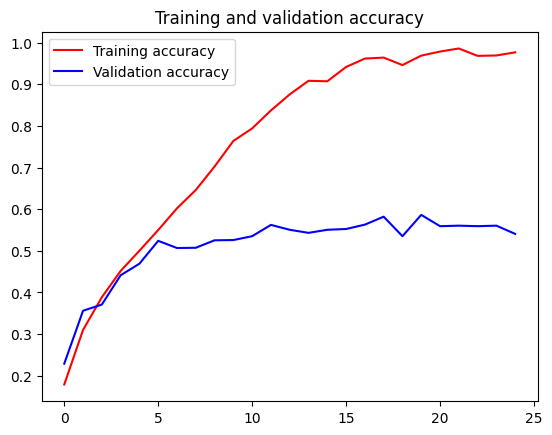

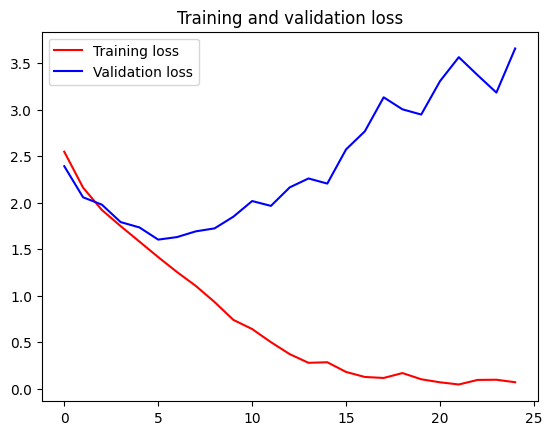

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluation of the model
In the following cells we've evaluated the model exploting the test set, obtaining its loss and accuracy.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print('test_acc:', test_accuracy)
print('test_loss:', test_loss)
history.history["test_loss"] = test_loss
history.history["test_accuracy"] = test_accuracy

24/24 [==============================] - 230s 6s/step - loss: 5.3315 - accuracy: 0.4505
test_acc: 0.45047488808631897
test_loss: 5.3315324783325195


Let's save our model.

In [ ]:
dir_name = os.path.join(root_path, "Models")
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
model.save(os.path.join(dir_name, 'model_balanced_training_set.h5'))
with open(os.path.join(dir_name, 'trainBalancedHistory'), 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
from tensorflow.keras import backend as K
del history
print('model deleted')
K.clear_session()

model deleted
